## 模拟退火算法(simulated annealing algorithm)

这是一种优化模型。即在有限的时间里找到最优解（或者近似最优解）  
在介绍SA算法之前，先介绍爬山算法。

### 爬山算法
爬山算法是一种比较简单的greedy算法(https://www.geeksforgeeks.org/greedy-algorithms/)。该算法每次从当前解的临近解空间中选择一个最优解作为当前解，直到达到一个局部最优解。问题是容易达到局部最优而不是全局最优。比如在下图中从 C 点出发，爬山算法只会取到A点，因为A点已经达到局部最优。

![](https://cdn.mathpix.com/snip/images/0X7H87W-v_KtKEbCfOM6UCvJUyhoXRyet2tSZqsUlnM.original.fullsize.png)

### 模拟退火思想

模拟退火是一种不完全的greedy算法，它的搜索过程引入了随机因素。模拟退火算法以**来接受一个比当前解要差的解**, 因此有可能会跳出这个局部的最优解, 达到全局的最优解。以上图为例, 模拟退火算法在搜索到局部最优解A后，会以一定的概率接受到E的移动。也许经过几次这样的不是局部最优的移动后会到达D点，于是就跳出了局部最大值A。

根据热力学的原理, 在温度为 $T$ 时, 出现能量差为 $d E$ 的降温的概率为 $P(\mathrm{dE})$, 表示为:
$$
P(d E)=\exp (d E /(k T))
$$
其中k是一个常数, exp表示自然指数, 且 $\mathrm(E)<0$ 。这条公式说白了就是: 温度越高, 出现一次能量差为 $\mathrm(dE)$ 的降温的概率就越大; 温度越低, 则出现降温的概率就越小。又由于 $\mathrm(dE)$ 总是小于0（否则就不叫退火 了）, 因此 $d E / k T<0$, 所以 $P(d E)$ 的函数取值范围是 $(0,1)$ 。
随着温度 $T$ 的降低, $P(\mathrm(dE))$ 会逐渐降低。
我们将一次向较差解的移动看做一次温度跳变过程, 我们以概率 $P(\mathrm(dE))$ 来接受这样的移动。




```  python
#### J(y)：在状态y时的评价函数值
#### Y(i)：表示当前状态
#### Y(i+1)：表示新的状态
#### r： 用于控制降温的快慢
#### T： 系统的温度，系统初始应该要处于一个高温的状态
#### T_min ：温度的下限，若温度T达到T_min，则停止搜索
while( T > T_min ):
　　dE = J( Y(i+1) ) - J( Y(i) ) 
　　if ( dE >=0 ):
        Y(i+1) = Y(i)
　　else
        # 函数exp( dE/T )的取值范围是(0,1) ，dE/T越大，则exp( dE/T )也
        if ( exp( dE/T ) > random( 0 , 1 ) ):
            Y(i+1) = Y(i) ; //接受从Y(i)到Y(i+1)的移动
　　T = r * T ; //降温退火 ，0<r<1 。r越大，降温越慢；r越小，降温越快
　　i ++ ;
)
```

### 范例1: 寻找polynomial function的最值

In [8]:
import numpy as np
import matplotlib.pyplot as plt

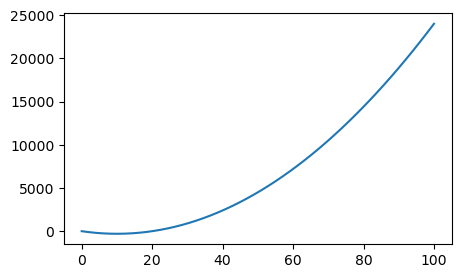

In [9]:

def x_function(x):
    return 3*x**2 - 60*x + 9

x = [i for i in np.linspace(0, 100)]
y = map(x_function, x)
plt.figure(figsize=(5, 3))
plt.plot(x, list(y))
plt.show()

定义域为[1,100], 最小值在x=10处取到

In [10]:
T = 1
# The initial temperature
x = np.random.uniform(0, 100)
# The final temperature
std = 0.00000001
# The cooling rate
a = 0.999
while T > std:
    y = x_function(x)
    # Generate a new x by random
    x_new = x + np.random.uniform(-1, 1)
    if 0 <= x_new <= 100:
        y_new = x_function(x_new)
        # If the new x is better, then replace the old x
        if y_new < y:
            x = x_new
        else:
            # If the new x is worse, then calculate the probability
            p = np.exp((y - y_new) / T)
            r = np.random.uniform(0, 1)
            if p > r:
                x = x_new
    # Cooling
    T = T * a
print(x, x_function(x))

10.000139004779843 -290.999999942033


### 范例2: 旅行商最短路径问题
问题定义：https://en.wikipedia.org/wiki/Travelling_salesman_problem

In [11]:
### Use the simulated annealing algorithm to solve traveling salesman problem
### step 1: create data
### Cr. https://cloud.tencent.com/developer/article/1424760
### Cr. https://www.cnblogs.com/heaad/archive/2010/12/20/1911614.html
import numpy as np
city = [(1304,2312),(3639,1315),(4177,2244),(3712,1399),\
    (3488,1535),(3326,1556),(3238,1229),(4196,1004),\
    (4312,790),(4386,570),(3007,1970),(2562,1756),\
    (2788,1491),(2381,1676),(1332,695),\
    (3715,1678),(3918,2179),(4061,2370),\
    (3780,2212),(3676,2578),(4029,2838),\
    (4263,2931),(3429,1908),(3507,2367),\
    (3394,2643),(3439,3201),(2935,3240),\
    (3140,3550),(2545,2357),(2778,2826),\
    (2370,2975)]
city = np.array(city)
print(city.shape)
### define the distance by Euclidean distance
def distance(a, b):
    return np.sqrt(np.sum((a-b)**2))
def path_distance(path):
    dis = 0
    for i in range(len(path)-1):
        dis += distance(city[path[i]], city[path[i+1]])
    return dis
def init_path():
    path = [i for i in range(len(city))]
    np.random.shuffle(path)
    return path
def change_path(path):
    new_path = path.copy()
    a = np.random.randint(0, len(city))
    b = np.random.randint(0, len(city))
    new_path[a], new_path[b] = new_path[b], new_path[a]
    return new_path
if __name__ == "__main__":
    path = init_path()
    print(path_distance(path))
    T = 1000
    std = 0.00000001
    a = 0.999
    while T > std:
        new_path = change_path(path)
        new_dis = path_distance(new_path)
        old_dis = path_distance(path)
        if new_dis < old_dis:
            path = new_path
        else:
            p = np.exp((old_dis - new_dis) / T)
            r = np.random.uniform(0, 1)
            if p > r:
                path = new_path
        T = T * a
    print("This is the best path:")
    for i in path:
        if(i == path[-1]):
            print(city[i])
        else:
            print(city[i], end="->")
    print("The distance is:")
    print(path_distance(path))

(31, 2)
44400.201859503104
This is the best path:
[3918 2179]->[3780 2212]->[3715 1678]->[3712 1399]->[4196 1004]->[4312  790]->[4386  570]->[3639 1315]->[3238 1229]->[2788 1491]->[2381 1676]->[2562 1756]->[3326 1556]->[3488 1535]->[3429 1908]->[3507 2367]->[4029 2838]->[4263 2931]->[4177 2244]->[4061 2370]->[3676 2578]->[3394 2643]->[3007 1970]->[2545 2357]->[2778 2826]->[3439 3201]->[3140 3550]->[2935 3240]->[2370 2975]->[1304 2312]->[1332  695]
The distance is:
16022.264169461982


## 粒子群算法

粒子群算法是通过模拟鸟群捕食行为设计的一种群智能算法。区域内有大大小小不同的食物源，鸟群的任务是找到最大的食物源（全局最优解），鸟群的任务是找到这个食物源。鸟群在整个搜寻的过程中，通过相互传递各自位置的信息，让其他的鸟知道食物源的位置最终，整个鸟群都能聚集在食物源周围，即我们所说的找到了最优解，问题收敛。

基本步骤：
1. 根据初始状态参数确定每一个粒子的初始适应度值
2. 初始全局最优解是初始适应度最大的粒子所在的位置，每一个粒子的局部最优为本身
3. 更新位置和移动速度
4. 迭代

核心公式：
$$
\begin{gathered}
V_{i d}=\omega V_{i d}+C_1 \operatorname{random}(0,1)\left(P_{i d}-X_{i d}\right)+C_2 \operatorname{random}(0,1)\left(P_{g d}-X_{i d}\right) \\
X_{i d}=X_{i d}+V_{i d}
\end{gathered}
$$

其中, $\omega$ 称为惯性因子其值为非负, 较大时, 全局寻优能力强, 局部寻优能力强, 较小时, 全局寻优能力弱, 局部寻优能力强. 通过调整 $\omega$ 的大小, 可以对全局寻优性能和局部寻优性能进行调整. $C_1$ 和 $C_2$ 称为加速常 数, 前者为每个粒子的个体学习因子, 后者为每个粒子的社会学习因子。Suganthan 的实验表明: $C_1$ 和 $C_2$ 为 常数时可以得到较好的解, 通常设置 $C_1=C_2=2$, 但不一定必须等于 2, 一般取 $C_1=C_2 \in[0,4]$ 。 $\operatorname{random}(0,1)$ 表示区间 $[0,1]$ 上的随机数, $P_{i d}$ 表示第 $\mathrm{i}$ 个变量的个体极值的第 $\mathrm{d}$ 维, $P_{g d}$ 表示全局最优解的 第 $\mathrm{d}$ 维。

优点：全局优化算法。非确定算法的优点在于算法能有更多机会求解全局最优解。迭代速度很快。

### 范例一：求最值

$$
y=x_2 e^{x_1}+x_3 \sin x_2+x_4 x_5
$$

The optimal value [25. 25.  1. 25. 25.]
The best fitting value 1800122483484.51


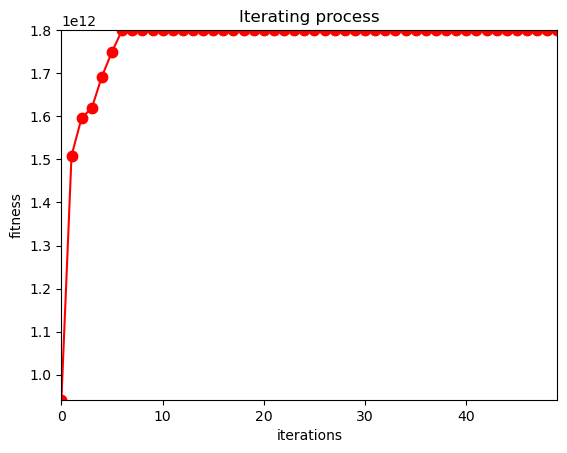

In [16]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # number of variables
        self.time = time  # iteration times
        self.size = size  # number of particles
        self.bound = []  # boundary of variables
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # the position of particles
        self.v = np.zeros((self.size, self.dimension))  # the velocity of particles
        self.p_best = np.zeros((self.size, self.dimension))  # the optimal position of particles
        self.g_best = np.zeros((1, self.dimension))[0]  # the optimal position of swarm

        ### initialize the position and velocity of particles
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            if fit > temp:
                self.g_best = self.p_best[i]
                temp = fit
    # define the fitness function
    def fitness(self, x):
        x1 = x[0]
        x2 = x[1]
        x3 = x[2]
        x4 = x[3]
        x5 = x[4]
        y = math.floor((x2 * np.exp(x1) + x3 * np.sin(x2) + x4 + x5) * 100) / 100
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # learning factor
        c2 = 2.0
        w = 0.8  # weight
        for i in range(size):
            # update the velocity and position of particles
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # check the boundary of velocity
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) > self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) > self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            temp = self.fitness(self.final_best)
            best.append(temp)
        print("The optimal value", self.final_best)
        print("The best fitting value", self.fitness(self.final_best))
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel("iterations") 
        plt.ylabel("fitness")  
        plt.title("Iterating process")  
        plt.show()


if __name__ == '__main__':
    time = 50
    size = 100
    dimension = 5
    v_low = -1
    v_high = 1
    low = [1, 1, 1, 1, 1]
    up = [25, 25, 25, 25, 25]
    pso = PSO(dimension, time, size, low, up, v_low, v_high)
    pso.pso()

